In [1]:
import sys; sys.path.append('../code')

In [2]:
import pandas
import matplotlib.pyplot as plt
import figurefirst as fifi # pip install figurefirst
import numpy as np

# Load and plot wind data from both stations

### Load horizontal wind data

In [4]:
horizontal_wind_df = pandas.read_hdf('../data_experiments_preprocessed/2021728_183722_windgps_data_horizontal.hdf')

### Plot 2D wind direction (parallel to ground)

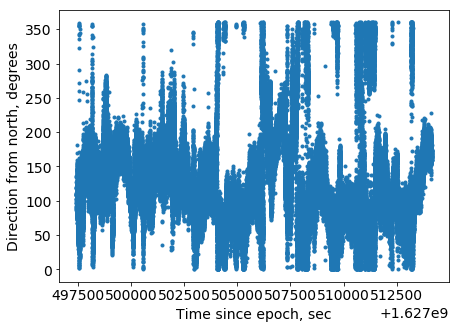

In [5]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(horizontal_wind_df.time_epoch, horizontal_wind_df.D, '.')

ax.set_ylabel('Direction from north, degrees')
ax.set_xlabel('Time since epoch, sec')

fifi.mpl_functions.set_fontsize(ax, 14)

### Plot wind magnitude (parallel to ground)

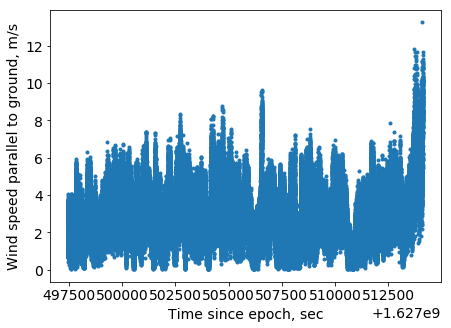

In [6]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(horizontal_wind_df.time_epoch, horizontal_wind_df.S2, '.')

ax.set_ylabel('Wind speed parallel to ground, m/s')
ax.set_xlabel('Time since epoch, sec')

fifi.mpl_functions.set_fontsize(ax, 14)

### Load vertical wind data

In [7]:
vertical_wind_df = pandas.read_hdf('../data_experiments_preprocessed/2021728_183846_windgps_data_vertical.hdf')

### Plot vertical wind magnitude

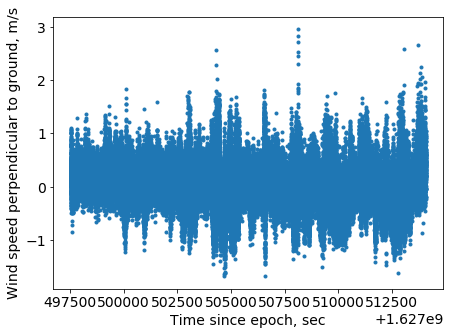

In [8]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(vertical_wind_df.time_epoch, vertical_wind_df.W, '.')

ax.set_ylabel('Wind speed perpendicular to ground, m/s')
ax.set_xlabel('Time since epoch, sec')

fifi.mpl_functions.set_fontsize(ax, 14)

# Merge station data and convert to math coordinates

In [9]:
from utility import wrap_angle, correct_wind_direction_for_trisonica

In [10]:
first_time = np.max([horizontal_wind_df.time_epoch.min(), vertical_wind_df.time_epoch.min()])
last_time = np.min([horizontal_wind_df.time_epoch.max(), vertical_wind_df.time_epoch.max()])
master_time = np.arange(first_time, last_time, 0.1)

In [11]:
zeta = np.interp(master_time, horizontal_wind_df.time_epoch, horizontal_wind_df.D)
zeta = correct_wind_direction_for_trisonica(np.radians(zeta))

w = np.interp(master_time, horizontal_wind_df.time_epoch, horizontal_wind_df.S2)

wz = np.interp(master_time, vertical_wind_df.time_epoch, vertical_wind_df.W)

In [12]:
merged_wind_df = pandas.DataFrame({'time_epoch': master_time,
                                   'zeta': zeta,
                                   'w': w,
                                   'wz': wz})


### Save merged data frame

In [13]:
merged_wind_df.to_hdf('../data_experiments_preprocessed/df_stationary_wind.hdf', 'stationary_wind_station_data')